# PROYECTO SIMULACION DE PROCESOS FINANCIEROS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('us_covid19_daily.csv')
data.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200927,56,7080459,90648092,11136.0,29432.0,404083.0,6080.0,20049.0,1511.0,...,101298794,2020-09-27T00:00:00Z,0,0,307,758,665609,35289,806258,e7c64e674bfc2af02802153452e53628d44c241c
1,20200926,56,7045170,89982483,11183.0,29554.0,403325.0,6057.0,20002.0,1509.0,...,100492536,2020-09-26T00:00:00Z,0,0,866,1154,886140,47733,1004261,e98f5076c72de4a27a283d22756b7d0b9a44d41f
2,20200925,56,6997437,89096343,10905.0,29769.0,402171.0,6133.0,19919.0,1506.0,...,99488275,2020-09-25T00:00:00Z,0,0,844,1331,856519,55526,1011675,8d311e73fe038522a1a6be4bc3202de206ec0adb
3,20200924,56,6941911,88239824,12008.0,30043.0,400840.0,6168.0,19555.0,1560.0,...,98476600,2020-09-24T00:00:00Z,0,0,921,1588,823449,43772,940353,375a88dd29991abc1946cd7f98f4f20a9e37fb5d
4,20200923,56,6898139,87416375,10535.0,29905.0,399252.0,6113.0,19452.0,1544.0,...,97536247,2020-09-23T00:00:00Z,0,0,1157,1451,800878,38567,923704,b4fe7067370631b26f8e988fd2524b5691235a09


## Limpieza de datos

In [4]:
clean_data = pd.DataFrame()
# Escoger las variables a analizar
clean_data['positives'] = data.T.loc['positive']
clean_data['recovered'] = data.T.loc['recovered']
clean_data['hospitalized'] = data.T.loc['hospitalizedCurrently']
clean_data['death'] = data.T.loc['death']
# Invertir datos para tener los valores iniciales al principio
clean_data = clean_data.iloc[::-1] 
# Reemplazar index por uno que tenga los vlores de forma descendiente
clean_data['index'] = [i for i in range(len(clean_data['death']))]
clean_data.set_index('index', inplace = True)
# Llenar valores nulos con ceros
clean_data.fillna(0, inplace = True)

# Mostrar la cola del data frame
clean_data.tail()

,positives,recovered,hospitalized,death
index,,,,
245,6898139,2672338.0,29905.0,193931.0
246,6941911,2710183.0,30043.0,194852.0
247,6997437,2727335.0,29769.0,195696.0
248,7045170,2750459.0,29554.0,196562.0
249,7080459,2766280.0,29432.0,196869.0


# Analisis inicial de datos

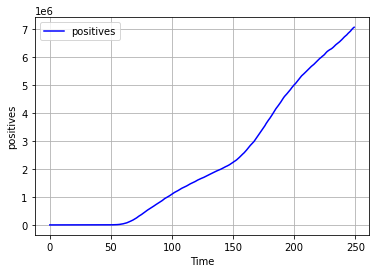

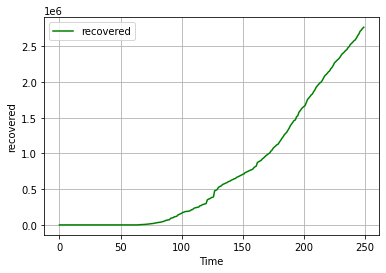

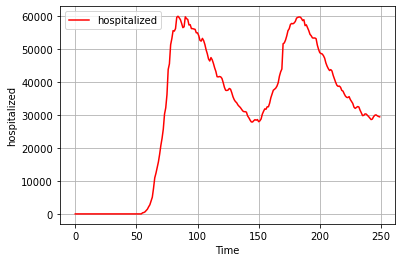

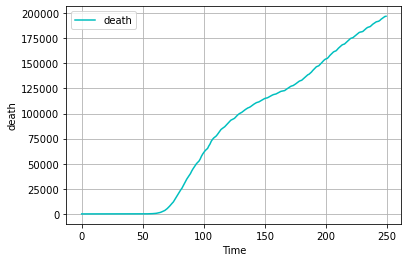

In [5]:
# Plotear los datos que tenemos individualmente para poder analizar cada uno por separado
color_index = 0
colors = "bgrcmykw"
for i in range(len([c for c in clean_data])):
    plt.plot(clean_data.iloc[:,i],label = [c for c in clean_data][i], c = colors[color_index])
    color_index += 1
    plt.xlabel('Time')
    plt.ylabel([c for c in clean_data][i])
    plt.legend()
    plt.grid()
    plt.show()